### Get some data

In [13]:
import psycopg2
conn = psycopg2.connect("host=localhost dbname=trilat user=postgres password=mysecretpassword")

In [14]:
cur = conn.cursor()

In [18]:
sql_getcategories = 'select sampleid, category, latitude, longitude from sample_categorized'
cur.execute(sql_getcategories)
sample_categorized = cur.fetchall()
cur.close()

In [30]:
sample_categorized

[(1, 10, Decimal('38.2654454'), Decimal('-85.7902195')),
 (2, 10, Decimal('38.2507081'), Decimal('-85.8151753')),
 (3, 10, Decimal('38.2552296'), Decimal('-85.760384')),
 (4, 10, Decimal('38.2166262'), Decimal('-85.765671')),
 (5, 10, Decimal('38.1336201'), Decimal('-85.5923781')),
 (6, 10, Decimal('38.1190464'), Decimal('-85.6628587')),
 (7, 10, Decimal('38.1810034'), Decimal('-85.8662888')),
 (8, 10, Decimal('37.70419'), Decimal('-85.8042156')),
 (9, 10, Decimal('37.814511'), Decimal('-85.4889091')),
 (10, 10, Decimal('38.2636656'), Decimal('-85.6983492')),
 (11, 10, Decimal('38.1465247'), Decimal('-85.5772287')),
 (12, 10, Decimal('38.2167898'), Decimal('-85.6574389')),
 (13, 10, Decimal('38.54471'), Decimal('-84.8216885')),
 (14, 10, Decimal('38.1516445'), Decimal('-85.6643049')),
 (15, 10, Decimal('38.7822919'), Decimal('-84.894638')),
 (16, 10, Decimal('37.4752081'), Decimal('-85.9759864')),
 (17, 10, Decimal('38.2701611'), Decimal('-85.8074523')),
 (18, 10, Decimal('38.1212116')

### K-Nearest Neighbors

In [67]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import time

In [46]:
X = np.array(sample_categorized)
X[:,[2,3]]

array([[Decimal('38.2654454'), Decimal('-85.7902195')],
       [Decimal('38.2507081'), Decimal('-85.8151753')],
       [Decimal('38.2552296'), Decimal('-85.760384')],
       ...,
       [Decimal('36.6092824'), Decimal('-88.3166309')],
       [Decimal('38.1040159'), Decimal('-85.585439')],
       [Decimal('42.0026567'), Decimal('-74.2626215')]], dtype=object)

In [113]:
def time_sklearn_nn(ppoints, qpoints, k=5):
    """Calculate k-nn
    input: ppoints - points from witch to pick k neighbors
    input: qpoints - query points
    k: the k in k-nn
    returns: distances, indices the output of sklearn.NearestNeighbors.kneighbors
    """
    print("Calculating 2-NN for {} points and {} query points".format(len(ppoints), len(qpoints)))
    start_time = time.perf_counter()
    nbrs = NearestNeighbors(n_neighbors=k, algorithm='ball_tree').fit(ppoints)
    f_time = time.perf_counter()
    fit_time = f_time - start_time
    print("time to fit {}".format(fit_time))
    distances, indices = nbrs.kneighbors(qpoints)
    nn_time = time.perf_counter() - f_time
    print("time to calc nearest neighbors: {}".format(nn_time))
    
    return fit_time, nn_time, len(ppoints), len(qpoints), k

In [75]:
# Extract some lat/long datasets by category
cat1 = X[X[:,1] == 1][:,[2,3]]
cat10 = X[X[:,1] == 10][:,[2,3]]

In [82]:
time_nn(cat1, cat10)

Calculating 2-NN for 100 points and 10000 query points
time to fit 0.0003116859952569939
time to calc nearest neighbors: 38909.216974352006


(38909.203439427, 37940.024170375, 38909.216974352006)

In [161]:
def iterate_categories(data):
    for i in range(10,16):
        for j in range(10,16):
            ppoints = data[data[:,1] == i][:, [2,3]]
            qpoints = data[data[:,1] == j][:, [2,3]]
            results = time_sklearn_nn(ppoints, qpoints, 5)
            yield(results)
    results = time_sklearn_nn(ppoints, data[:, [2,3]])
    yield(results)

In [120]:
test_times = list(iterate_categories(X))

Calculating 2-NN for 100 points and 100 query points
time to fit 0.00023882400273578241
time to calc nearest neighbors: 0.0006209179991856217
Calculating 2-NN for 100 points and 900 query points
time to fit 0.00047555799392284825
time to calc nearest neighbors: 0.0017874260011012666
Calculating 2-NN for 100 points and 2000 query points
time to fit 0.00032597500103292987
time to calc nearest neighbors: 0.0029395399978966452
Calculating 2-NN for 100 points and 5000 query points
time to fit 0.00019841299945255741
time to calc nearest neighbors: 0.008112881994748022
Calculating 2-NN for 100 points and 10000 query points
time to fit 0.00025048100360436365
time to calc nearest neighbors: 0.013095782000164036
Calculating 2-NN for 100 points and 32000 query points
time to fit 0.000254746999416966
time to calc nearest neighbors: 0.040074450997053646
Calculating 2-NN for 900 points and 100 query points
time to fit 0.0005409489967860281
time to calc nearest neighbors: 0.0010170400055358186
Calcul

Make Some Plots

In [155]:
test_times.pop()
test_times

[(0.00023882400273578241, 0.0006209179991856217, 100, 100, 5),
 (0.00047555799392284825, 0.0017874260011012666, 100, 900, 5),
 (0.00032597500103292987, 0.0029395399978966452, 100, 2000, 5),
 (0.00019841299945255741, 0.008112881994748022, 100, 5000, 5),
 (0.00025048100360436365, 0.013095782000164036, 100, 10000, 5),
 (0.000254746999416966, 0.040074450997053646, 100, 32000, 5),
 (0.0005409489967860281, 0.0010170400055358186, 900, 100, 5),
 (0.0004475349996937439, 0.005829978996189311, 900, 900, 5),
 (0.0004474620000110008, 0.012812245993700344, 900, 2000, 5),
 (0.0004680159981944598, 0.03201780300150858, 900, 5000, 5),
 (0.000574241996218916, 0.06478232100198511, 900, 10000, 5),
 (0.0005403420000220649, 0.20275964299798943, 900, 32000, 5),
 (0.001059942995198071, 0.0020339760012575425, 2000, 100, 5),
 (0.0010100859944941476, 0.007336574999499135, 2000, 900, 5),
 (0.001038271002471447, 0.016260407996014692, 2000, 2000, 5),
 (0.0010164949999307282, 0.03960696400463348, 2000, 5000, 5),
 (0.

In [156]:
x = [i[2] for i in test_times]
y = [i[3] for i in test_times]
z = [i[1] for i in test_times]
mintime = min(z)
sizes = [i/mintime for i in z]
colors = rng.rand(len(x))

In [157]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
rng = np.random.RandomState(0)

In [158]:
sizes

[1.0,
 2.8786828590016773,
 4.734183904721818,
 13.065947525097751,
 21.09100077198614,
 64.54064956985326,
 1.6379618675408656,
 9.389289735256096,
 20.634360753762202,
 51.56526794762306,
 104.3331343059015,
 326.54818070006536,
 3.2757562253393315,
 11.815690653389943,
 26.18768986781085,
 63.78775306333661,
 127.09319283529369,
 406.9802813437152,
 2.8348686967355343,
 19.824324652746856,
 44.32376905240225,
 126.5865832606032,
 251.72092483189263,
 725.6172917981042,
 3.7158771463980074,
 26.883894527101074,
 60.908293929386,
 149.1884437612552,
 301.3709946364072,
 957.4936993017908,
 5.6891586452604175,
 44.35601808191209,
 108.76047576282261,
 291.2529291061741,
 506.1720539729397]

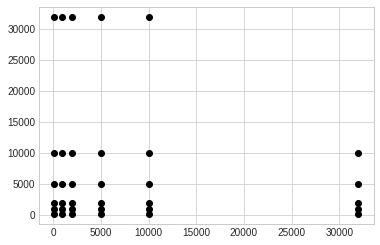

In [159]:
plt.plot(x, y, 'o', color='black')

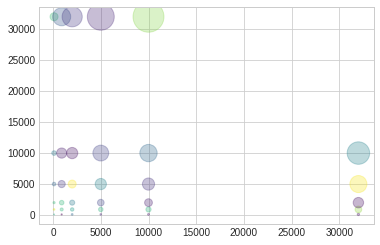

In [160]:
plt.scatter(x, y, s = sizes, c = colors, alpha=0.3, cmap='viridis')